Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..977].


Shape: (4, 2316, 2366)


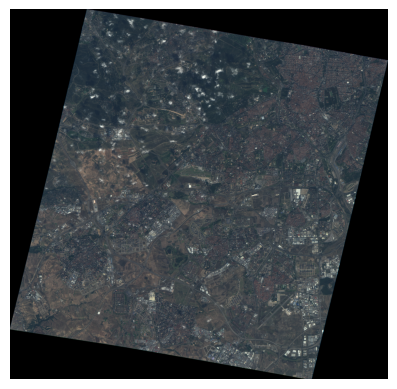

True

In [115]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = tiff.imread("D:/Documents/telechargement/cds/MadridESP_119786_20161028_2A_MS/IMAGERY.tif")
print("Shape:", img.shape) 

img = np.transpose(img, (1, 2, 0))  


img_rgb = img[:, :, :3]
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#tiff.imsave("image_convertie4.tif", img_rgb)
cv2.imwrite("image_convertie_1.jpg", cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))


In [126]:
import cv2
import numpy as np

img = cv2.imread("image_convertie_1.jpg")
h, w = img.shape[:2]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key=cv2.contourArea)

epsilon = 0.02 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

if len(approx) == 4:
    pts = approx.reshape(4, 2).astype(np.float32)

    def order_points(pts):
        s = pts.sum(axis=1)
        diff = np.diff(pts, axis=1)
        return np.array([
            pts[np.argmin(s)],       # top-left
            pts[np.argmin(diff)],    # top-right
            pts[np.argmax(s)],       # bottom-right
            pts[np.argmax(diff)]     # bottom-left
        ], dtype="float32")

    rect = order_points(pts)

    dst = np.array([
        [0, 0],
        [w - 1, 0],
        [w - 1, h - 1],
        [0, h - 1]
    ], dtype="float32")

    # Redresser 
    M = cv2.getPerspectiveTransform(rect, dst)
    corrected = cv2.warpPerspective(img, M, (w, h))

    cv2.imwrite("image_recadree_Madrid1.jpg", corrected)
    cv2.imwrite("image_recadree_Madrid1.tif", corrected)
else:
    print("Pas 4 coins détectés pour redressement.")


In [101]:
from PIL import Image

img = Image.open("image_convertie_1.jpg")

# Recadrage manuel : crop(left, upper, right, lower)
#img_crop = img.crop((30, 25, img.width - 25, img.height - 20))

#img_crop.save("image_recadree_manuellement.jpg")
img.save("image_convertie_1.tif")

In [111]:
from PIL import Image

img = Image.open("image_convertie_1.tif")
img = img.rotate(9, expand=True)
gray = img.convert("L")
bbox = gray.getbbox()

if bbox:
    img_cropped = img.crop(bbox)
    img_cropped.save("image_crop_auto.tif")
    img_cropped.save("image_crop_auto.jpg")
    print("Image rognée et sauvegardée.")
else:
    print("Image entièrement noire.")


Image rognée et sauvegardée.


In [136]:
from PIL import Image

img = Image.open("image_recadree_Madrid1.tif")

# Recadrage manuel : crop(left, upper, right, lower)
img_crop = img.crop((0, 0, img.width - 0, img.height - 8))

img_crop.save("image_recadree_Madrid.jpg")
img_crop.save("image_recadree_Madrid.tif")
